In [26]:
import pandas as pd

In [27]:
covid_data = pd.read_csv("covid-19.csv")
covid_data

,Date,Name of State / UT,Latitude,Longitude,Total Confirmed cases,Death,Cured/Discharged/Migrated,New cases,New deaths,New recovered
0,30-01-2020,Kerala,10.8505,76.2711,1,0,0,0,0,0
1,31-01-2020,Kerala,10.8505,76.2711,1,0,0,0,0,0
2,01-02-2020,Kerala,10.8505,76.2711,2,0,0,1,0,0
3,02-02-2020,Kerala,10.8505,76.2711,3,0,0,1,0,0
4,03-02-2020,Kerala,10.8505,76.2711,3,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
4687,06-08-2020,Telangana,18.1124,79.0193,73050,589,52103,2092,0,1289
4688,06-08-2020,Tripura,23.9408,91.9882,5725,31,3793,97,0,68
4689,06-08-2020,Uttar Pradesh,26.8467,80.9462,104388,1857,60558,4078,0,3287
4690,06-08-2020,Uttarakhand,30.0668,79.0193,8254,98,5233,246,0,386


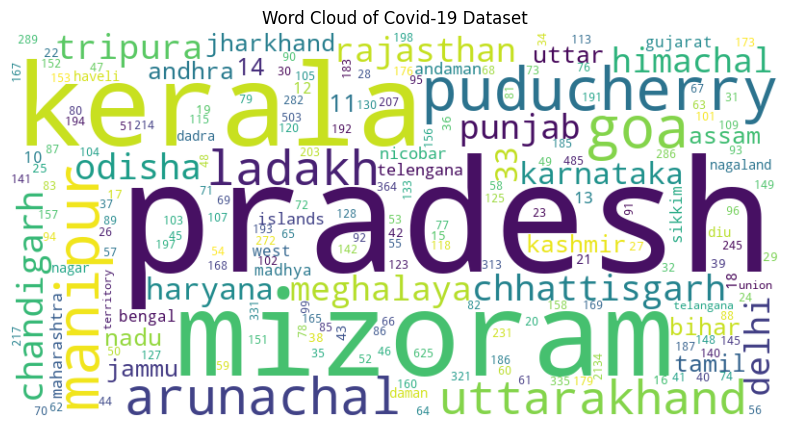

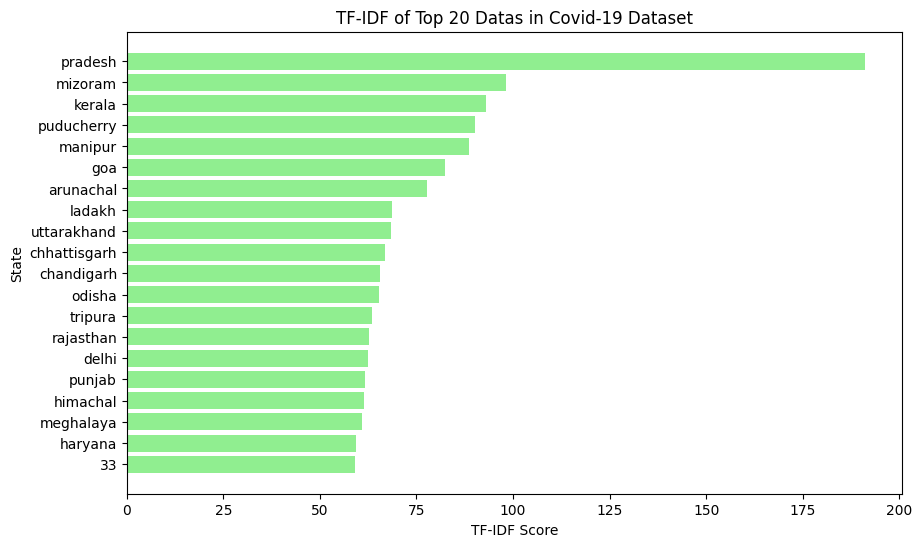

In [22]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt

covid_data = pd.read_csv('covid-19.csv')

covid_data['Text'] = covid_data['Name of State / UT'].astype(str) + ' ' + covid_data['Total Confirmed cases'].astype(str) + ' ' + covid_data['Death'].astype(str) + ' ' + covid_data['Cured/Discharged/Migrated'].astype(str)
text_data = covid_data['Text'].values.tolist()

vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(text_data)

feature_names = vectorizer.get_feature_names_out()
word_freq = dict(zip(feature_names, tfidf_matrix.sum(axis=0).tolist()[0]))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Covid-19 Dataset')
plt.show()

tfidf_values = tfidf_matrix.sum(axis=0).A1
data = {'Term': feature_names, 'TF-IDF': tfidf_values}
df = pd.DataFrame(data)
df = df.sort_values(by='TF-IDF', ascending=False).head(20)

plt.figure(figsize=(10, 6))
plt.barh(df['Term'], df['TF-IDF'], color='lightgreen') 
plt.ylabel('State')
plt.title('TF-IDF of Top 20 Datas in Covid-19 Dataset')
plt.gca().invert_yaxis()
plt.show()


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11100\2003995344.py:11: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  covid_data['Date'] = pd.to_datetime(covid_data['Date'])


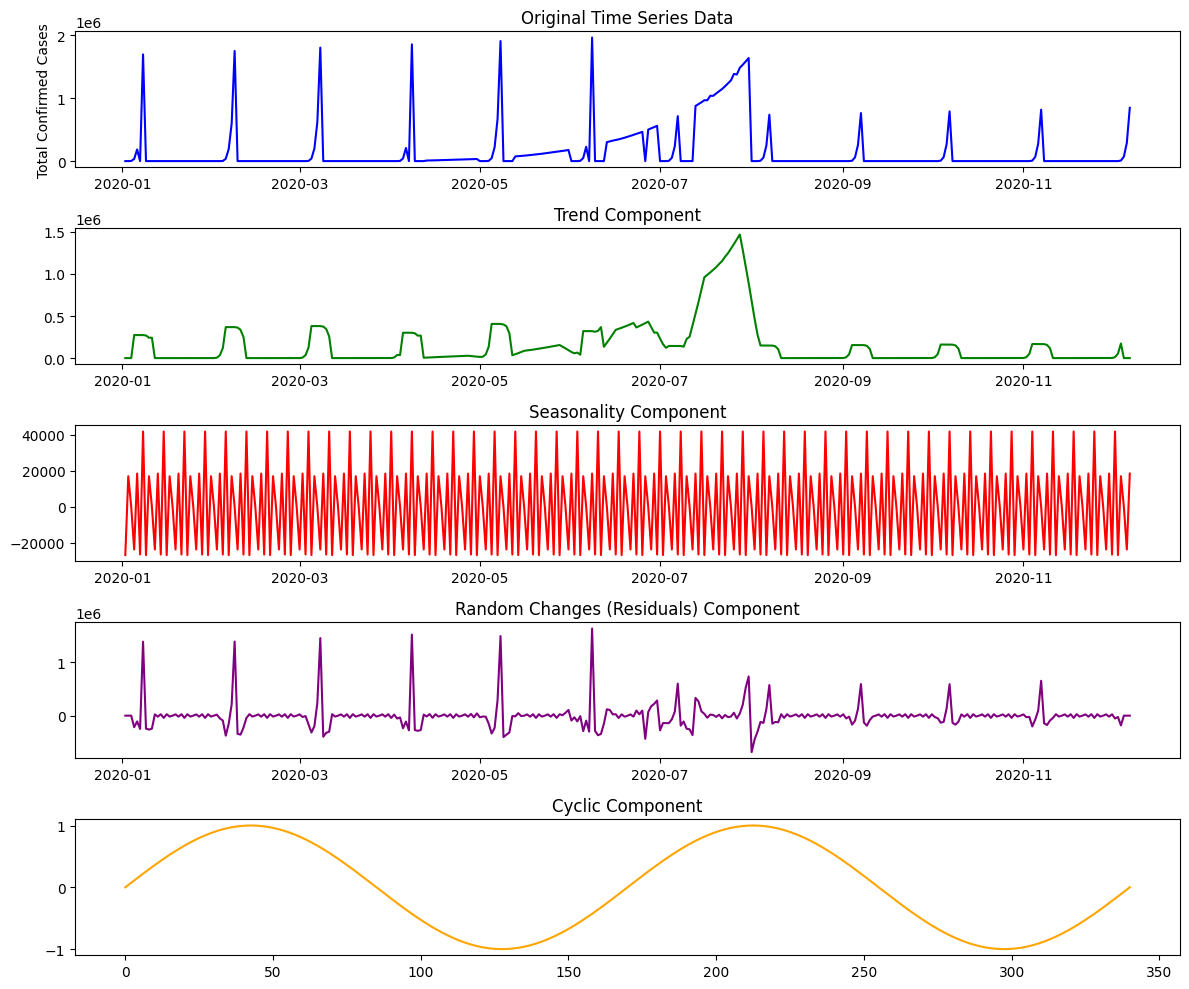

Mean Square Error (Additive Model): 2315860125.265436
Mean Square Error (Multiplicative Model): 2.82857572624945e+30


In [28]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tools.eval_measures import mse

# Generate a cyclic signal
n = len(time_series_data)
cyclic_signal = np.sin(np.linspace(0, 4*np.pi, n))

# Convert 'Date' column to datetime
covid_data['Date'] = pd.to_datetime(covid_data['Date'])

# Set 'Date' column as index
covid_data.set_index('Date', inplace=True)

# Assuming 'Total Confirmed cases' as the time series data
time_series_data = covid_data['Total Confirmed cases']

# Resample the data to daily frequency
time_series_data = time_series_data.resample('D').sum()

# Perform seasonal decomposition
decomposition = seasonal_decompose(time_series_data, model='additive')

# Ensure there are no NaN values in the components
decomposition_trend = decomposition.trend.fillna(0)
decomposition_seasonal = decomposition.seasonal.fillna(0)
decomposition_resid = decomposition.resid.fillna(0)

# Plot the components with titles and colors
plt.figure(figsize=(12, 10))

# Original Data
plt.subplot(511)
plt.plot(time_series_data, color='blue')
plt.title('Original Time Series Data')
plt.ylabel('Total Confirmed Cases')

# Trend Component
plt.subplot(512)
plt.plot(decomposition_trend, color='green')
plt.title('Trend Component')

# Seasonality Component
plt.subplot(513)
plt.plot(decomposition_seasonal, color='red')
plt.title('Seasonality Component')

# Random Changes (Residuals) Component
plt.subplot(514)
plt.plot(decomposition_resid, color='purple')
plt.title('Random Changes (Residuals) Component')

# Cyclic Component
plt.subplot(515)
plt.plot(cyclic_signal, color='orange')
plt.title('Cyclic Component')

plt.tight_layout()
plt.show()

# Model the data as additive and multiplicative
additive_model = decomposition_trend + decomposition_seasonal + decomposition_resid + cyclic_signal
multiplicative_model = decomposition_trend * decomposition_seasonal * decomposition_resid * cyclic_signal

# Calculate mean square error for each model
mse_additive = mse(time_series_data, additive_model)
mse_multiplicative = mse(time_series_data, multiplicative_model)

print("Mean Square Error (Additive Model):", mse_additive)
print("Mean Square Error (Multiplicative Model):", mse_multiplicative)


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11100\3278852881.py:11: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  covid_data['Date'] = pd.to_datetime(covid_data['Date'])


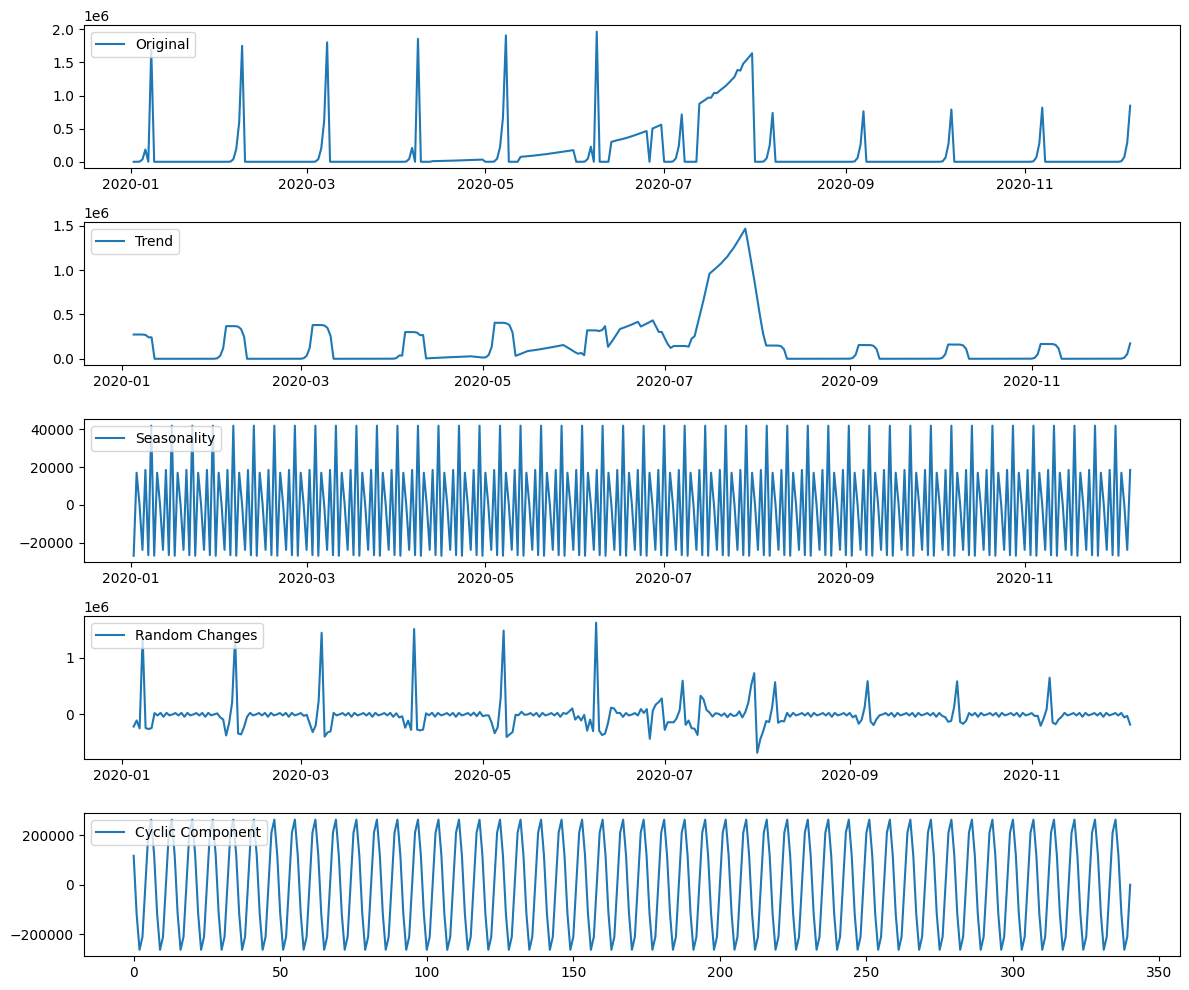

Mean Square Error (Additive Model with Cyclic Component): nan
Mean Square Error (Multiplicative Model): nan


In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tools.eval_measures import mse

# Load the COVID-19 dataset
covid_data = pd.read_csv("covid-19.csv")

# Convert 'Date' column to datetime
covid_data['Date'] = pd.to_datetime(covid_data['Date'])

# Set 'Date' column as index
covid_data.set_index('Date', inplace=True)

# Assuming 'Total Confirmed cases' as the time series data
time_series_data = covid_data['Total Confirmed cases']

# Resample the data to daily frequency
time_series_data = time_series_data.resample('D').sum()

# Fill missing values using interpolation
time_series_data = time_series_data.interpolate(method='linear')

# Perform seasonal decomposition
decomposition = seasonal_decompose(time_series_data, model='additive')

# Add a cyclic component based on the day of the week
day_of_week_cycle = np.sin(2 * np.pi * time_series_data.index.dayofweek / 7)  # Assuming weekly cycle
cyclic_component = day_of_week_cycle * decomposition.trend.std()  # Scaling by trend standard deviation

# Add the cyclic component to the trend
trend_with_cycle = decomposition.trend + cyclic_component

# Plot the components
plt.figure(figsize=(12, 10))
plt.subplot(511)
plt.plot(time_series_data, label='Original')
plt.legend(loc='upper left')
plt.subplot(512)
plt.plot(decomposition.trend, label='Trend')
plt.legend(loc='upper left')
plt.subplot(513)
plt.plot(decomposition.seasonal, label='Seasonality')
plt.legend(loc='upper left')
plt.subplot(514)
plt.plot(decomposition.resid, label='Random Changes')
plt.legend(loc='upper left')
plt.subplot(515)
plt.plot(cyclic_component, label='Cyclic Component')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

# Model the data as additive
additive_model = trend_with_cycle + decomposition.seasonal + decomposition.resid

# Calculate mean square error for the model with cyclic component
mse_additive = mse(time_series_data, additive_model)

print("Mean Square Error (Additive Model with Cyclic Component):", mse_additive)

# Model the data as multiplicative
multiplicative_model = decomposition.trend * decomposition.seasonal * decomposition.resid

# Calculate mean square error for the multiplicative model
mse_multiplicative = mse(time_series_data, multiplicative_model)

print("Mean Square Error (Multiplicative Model):", mse_multiplicative)
